# Lab: Binary classification with decision trees

**Author**: J. Hickman

The breast cancer dataset is a well studied binary classification dataset.

* Classes: 2
* Samples per class: 212(M),357(B)
* Samples total:569
* Dimensionality: 30
* Features: real, positive

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is downloaded from: https://goo.gl/U2Uwz2

In this lab we will use the dataset to train a decision tree model. 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

**Instructions** 
* Read and work through all tutorial content and do all exercises below
  
**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**For reference recall the following definitions**
* Accuracy classification score. In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
  
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
  * The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
  * The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html


#### 4.1.0 Student information 

Please provide the following information 

In [163]:
# ## Name: Isfar Baset
# ## Date: 11/11/23
# ## Class Section: 01
# ## Lab Section: 01

#### Import

In [164]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#### 4.1.1: Import 

The following code will import the data file into a pandas data-frame

In [165]:
df=pd.read_csv('../eda/cars-data.csv')
print(df.iloc[0])

Unnamed: 0                   0
city_mpg                    18
class              midsize car
combination_mpg             21
cylinders                  4.0
displacement               2.2
drive                      fwd
fuel_type                  gas
highway_mpg                 26
make                    toyota
model                    Camry
transmission                 a
year                      1993
Name: 0, dtype: object


In [166]:
# get y 

y = df['fuel_type'].unique().tolist()

# Replace 'diesel' with 'gas' in the entire DataFrame
df.replace('diesel', 'gas', inplace=True)

y = df['fuel_type'].unique().tolist()

y

['gas', 'electricity']

In [167]:
# Using a for loop to replace categorical values with cat codes

df['fuel_type'] = df['fuel_type'].astype('category')
df['fuel_type'] = df['fuel_type'].cat.codes

# Display the altered DataFrame
df.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,1,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,1,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,1,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,1,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,1,26,toyota,Camry,a,1993


In [168]:
# Drop non-numerical columns
df = df.select_dtypes(include=['number'])

df

,Unnamed: 0,city_mpg,combination_mpg,cylinders,displacement,fuel_type,highway_mpg,year
0,0,18,21,4.0,2.2,1,26,1993
1,1,19,22,4.0,2.2,1,27,1993
2,2,16,19,6.0,3.0,1,22,1993
3,3,16,18,6.0,3.0,1,22,1993
4,4,18,21,4.0,2.2,1,26,1993
...,...,...,...,...,...,...,...,...
714,714,80,76,NaN,NaN,0,72,2021
715,715,89,85,NaN,NaN,0,82,2023
716,716,79,76,NaN,NaN,0,72,2023
717,717,74,70,NaN,NaN,0,66,2022


In [169]:
# Dropping non-numerical and unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [170]:

# Dropping non-numerical and unnecessary columns
df = df.drop(columns=['year'])

In [171]:
# LOAD THE DATAFRAME
from sklearn.datasets import load_breast_cancer

# (x,y) = load_breast_cancer(return_X_y=True,as_frame=True)
# df=pd.concat([x,y],axis=1)
# df=pd.read_csv('../eda/ev-wiki-crawl-results.csv')
# LOOK AT FIRST ROW
print(df.iloc[0])

city_mpg           18.0
combination_mpg    21.0
cylinders           4.0
displacement        2.2
fuel_type           1.0
highway_mpg        26.0
Name: 0, dtype: float64


In [172]:
# INSERT CODE TO PRINT ITS SHAPE AND COLUMN NAMES

print(df.shape)
df.columns

(719, 6)


Index(['city_mpg', 'combination_mpg', 'cylinders', 'displacement', 'fuel_type',
       'highway_mpg'],
      dtype='object')

#### 4.1.2: Basic data exploration

We will be using y="target" (output target) and all other remaining columns as our X (input feature) matrix. 

Before doing analysis it is always good to "get inside" the data and see what we are working with

In [173]:
#INSERT CODE TO PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN 

summary = df.describe().T  
summary['dtypes'] = df.dtypes 
summary = summary[['dtypes', 'min', 'mean', 'max']]  
print(summary)

                  dtypes   min       mean    max
city_mpg           int64   9.0  34.051460  150.0
combination_mpg    int64  11.0  35.094576  136.0
cylinders        float64   3.0   5.154622   10.0
displacement     float64   1.4   2.760336    6.2
fuel_type           int8   0.0   0.834492    1.0
highway_mpg        int64  12.0  37.329624  123.0


In [174]:
# Count the number of samples for each target value
# resource: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html


target_counts = df['fuel_type'].value_counts(normalize=True)  # normalize=True to get the proportions

# Print the results
for target, count in target_counts.items():
    print(f"Number of points with target={target}: {count * len(df)} {count}")

Number of points with target=1: 600.0 0.8344923504867872
Number of points with target=0: 118.99999999999999 0.16550764951321278


(6, 6)


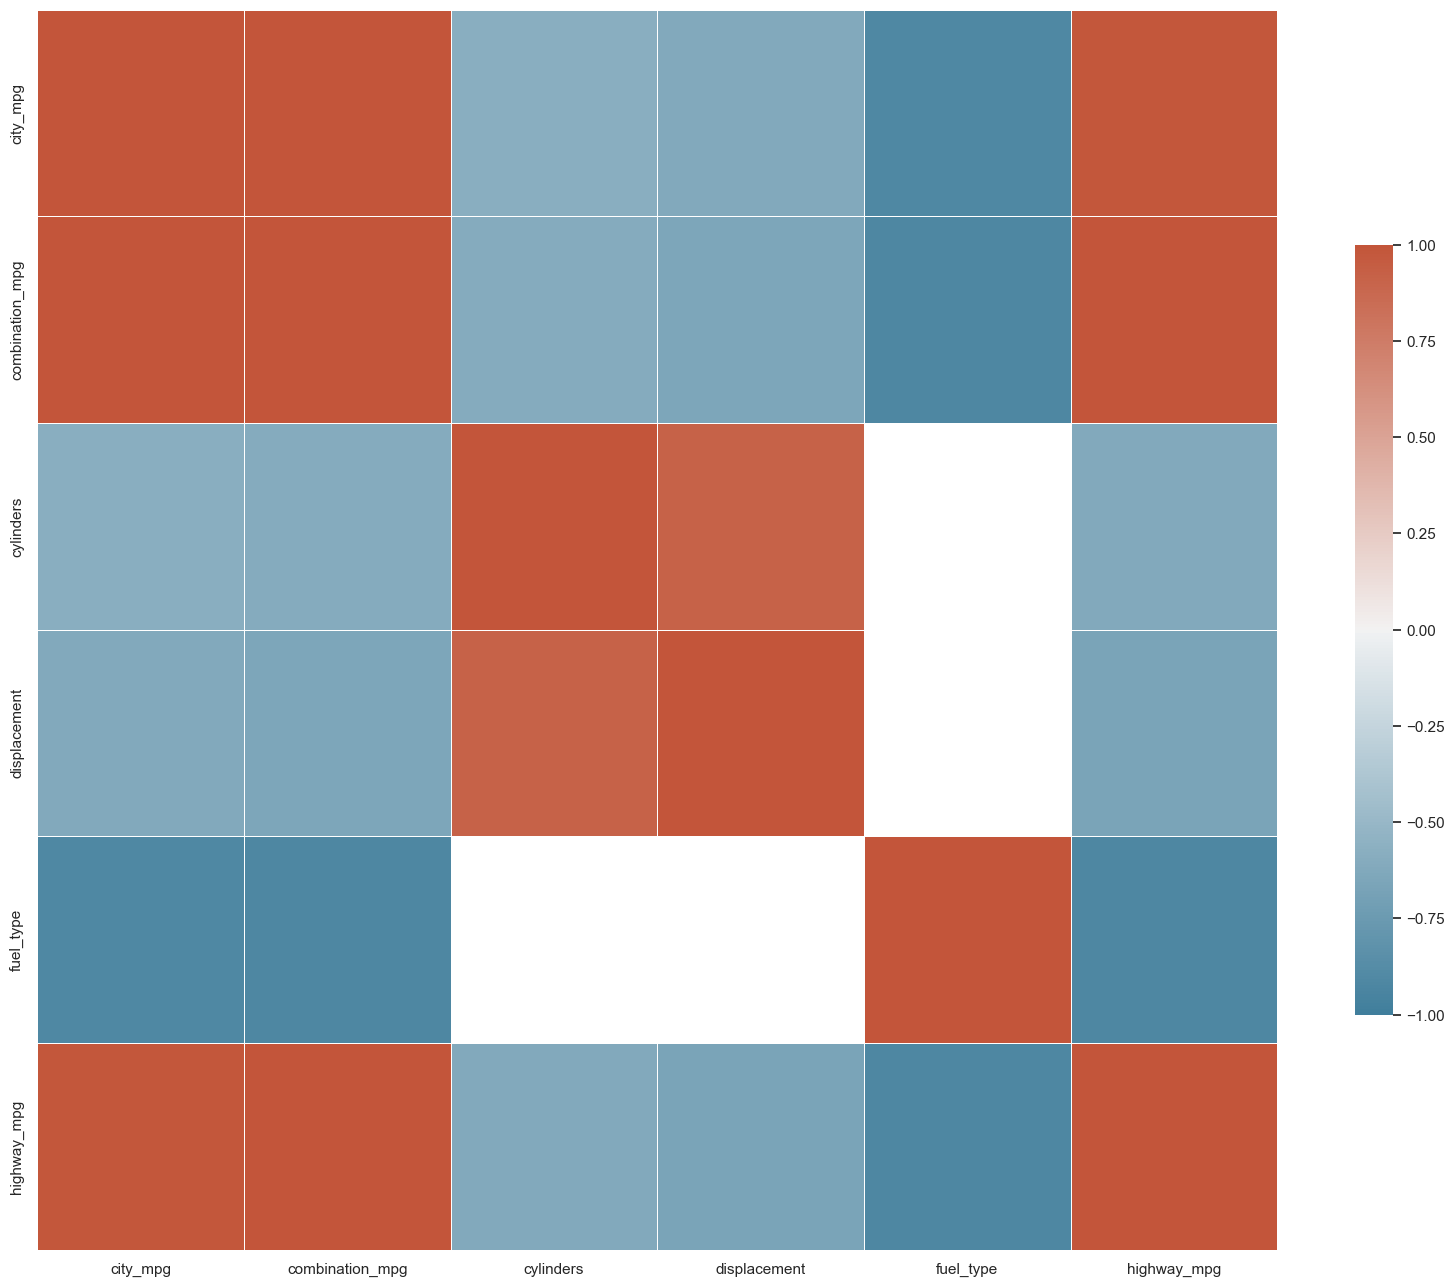

In [175]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

When the dataset is very large then the seaborn pairplot is often very slow. 

However, in this case it can still be useful to look at a subset of the features

In [176]:
import pandas as pd

# Assuming df is your DataFrame and y is a Series or DataFrame to be concatenated
n_samples = 10  # or any number you desire

# Check if df has enough rows to sample without replacement
if df.shape[0] >= n_samples:  # Make sure to use shape[0] for rows
    # Sample without replacement
    df_sampled = df.sample(n=n_samples, axis=0)  # Sample rows with axis=0
else:
    # Sample with replacement if not enough rows, or adjust n_samples as needed
    df_sampled = df.sample(n=n_samples, replace=True, axis=0)  # Sample rows with axis=0

# Now concatenate the sampled DataFrame with y along the columns
tmp = pd.concat([df_sampled, df], axis=1)  # Concatenate along columns


 #### 4.1.3  Isolate inputs/output & Split data

In [177]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
# Resource used: https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed


X = df.drop('fuel_type', axis=1)  # X includes everything except the target column
y = df['fuel_type']  # Y is just the target column

In [178]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [179]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
# Changed the output structure for better understanding

print("TRAINING SHAPES: \n", f"x_train:\n shape: {x_train.shape}\n type: {type(x_train)}\n", f"y_train:\n shape: {y_train.shape}\n type: {type(y_train)}\n")
print("TEST SHAPES: \n", f"x_test:\n shape: {x_test.shape}\n type: {type(x_test)}\n", f"y_test:\n shape: {y_test.shape}\n type: {type(y_test)}\n")

TRAINING SHAPES: 
 x_train:
 shape: (575, 5)
 type: <class 'pandas.core.frame.DataFrame'>
 y_train:
 shape: (575,)
 type: <class 'pandas.core.series.Series'>

TEST SHAPES: 
 x_test:
 shape: (144, 5)
 type: <class 'pandas.core.frame.DataFrame'>
 y_test:
 shape: (144,)
 type: <class 'pandas.core.series.Series'>



 #### 4.1.4  Training the model

In [180]:
#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

 #### 4.1.5  Check the results 

Evaluate the performance of the decision tree model by using the test data. 

In [181]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

Use the following reference to display the confusion matrix.
 [SKlearn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) will give you the code you need. 

 In the function below, also print the following as part of the function output
 ```
ACCURACY: 0.9035087719298246
NEGATIVE RECALL (Y=0): 0.9574468085106383
NEGATIVE PRECISION (Y=0): 0.8333333333333334
POSITIVE RECALL (Y=1): 0.8656716417910447
POSITIVE PRECISION (Y=1): 0.9666666666666667
[[45  2]
 [ 9 58]]
 ```

In [182]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def confusion_plot(y_data, y_pred):

    cm = confusion_matrix(y_data, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_data, y_pred)
    negative_recall = recall_score(y_data, y_pred, average=None)
    negative_precision = precision_score(y_data, y_pred, average=None)
    positive_recall = recall_score(y_data, y_pred, average=None)
    positive_precision = precision_score(y_data, y_pred, average=None)
    
    # Print metrics
    print(f"ACCURACY: {accuracy}")
    print(f"NEGATIVE RECALL (Y=0): {negative_recall}")
    print(f"NEGATIVE PRECISION (Y=0): {negative_precision}")
    print(f"POSITIVE RECALL (Y=1): {positive_recall}")
    print(f"POSITIVE PRECISION (Y=1): {positive_precision}")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    plt.show()

------TRAINING------
ACCURACY: 0.991304347826087
NEGATIVE RECALL (Y=0): [1.         0.98951782]
NEGATIVE PRECISION (Y=0): [0.95145631 1.        ]
POSITIVE RECALL (Y=1): [1.         0.98951782]
POSITIVE PRECISION (Y=1): [0.95145631 1.        ]
[[ 98   0]
 [  5 472]]


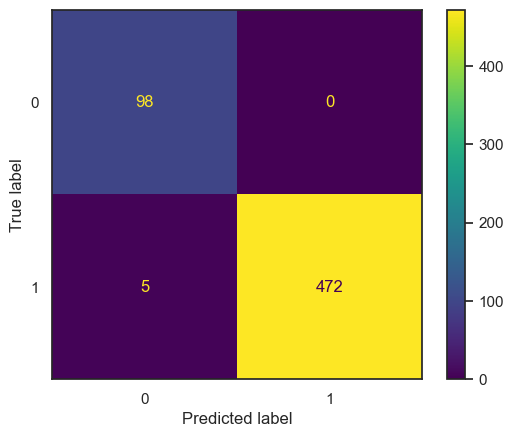

------TEST------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): [1. 1.]
NEGATIVE PRECISION (Y=0): [1. 1.]
POSITIVE RECALL (Y=1): [1. 1.]
POSITIVE PRECISION (Y=1): [1. 1.]
[[ 21   0]
 [  0 123]]


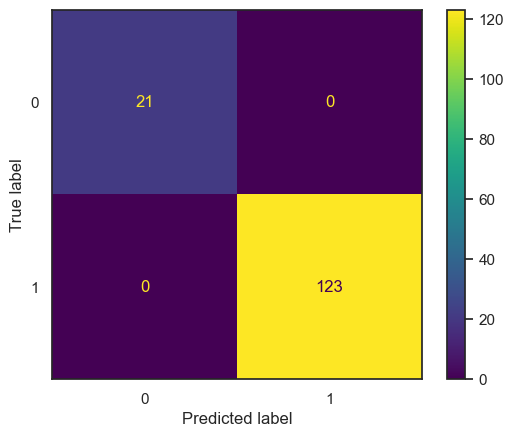

In [183]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

 #### 4.1.6  Visualize the tree

In [184]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
def plot_tree(model,X,Y):
    
    plt.figure(figsize=(20, 10))
    plot = tree.plot_tree(model, 
                          feature_names=X.columns, 
                          class_names=True, 
                          filled=True)
    plt.show()

In [185]:
plot_tree(model,X,y)

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['city_mpg', 'combination_mpg', 'cylinders', 'displacement',
       'highway_mpg'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

 #### 4.1.6  Hyper-parameter turning

The "max_depth" hyper-parameter lets us control the number of layers in our tree.

Lets iterate over "max_depth" and try to find the set of hyper-parameters with the lowest training AND test error.

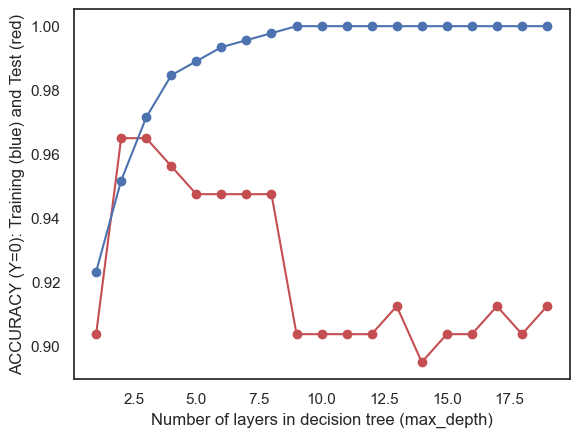

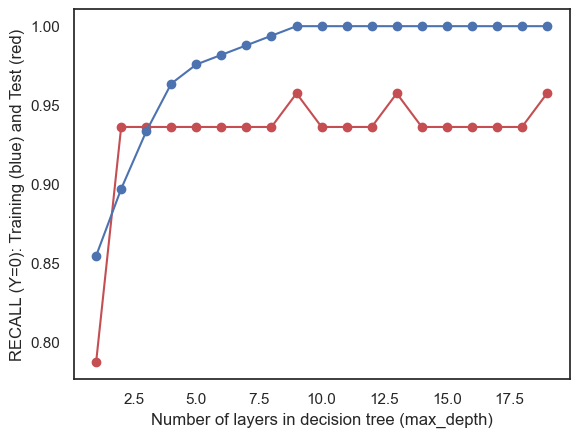

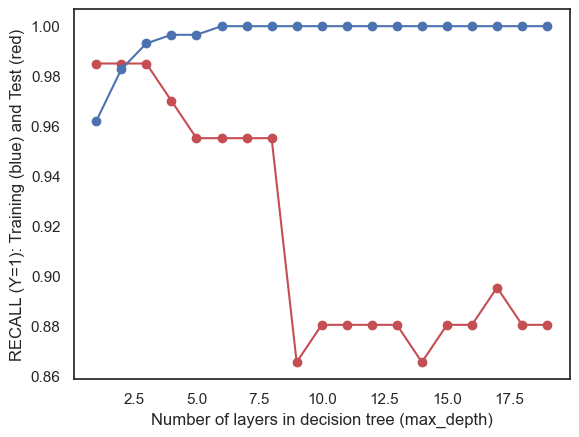

In [ ]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])

test_results=np.array(test_results)
train_results=np.array(train_results)
col=1
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('ACCURACY (Y=0): Training (blue) and Test (red)') 
plt. show()

col=2
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('RECALL (Y=0): Training (blue) and Test (red)') 
plt. show()

col=3
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('RECALL (Y=1): Training (blue) and Test (red)') 
plt. show()

 #### 4.1.7 Train optimal model 
 
 Re-train the decision tree using the optimal hyper-parameter obtained from the plot above
 

In [ ]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 0.9714285714285714
NEGATIVE RECALL (Y=0): 0.993103448275862
NEGATIVE PRECISION (Y=0): 0.9632107023411371
POSITIVE RECALL (Y=1): 0.993103448275862
POSITIVE PRECISION (Y=1): 0.9632107023411371
[[154  11]
 [  2 288]]


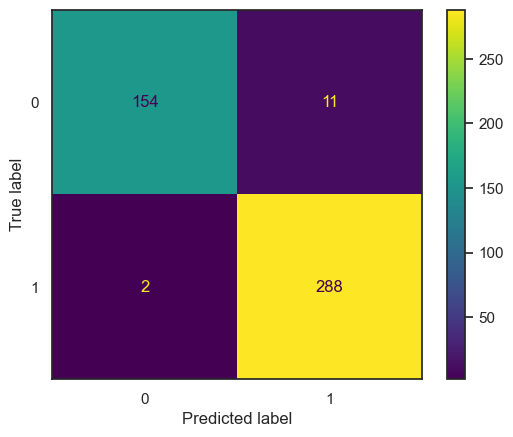

------TEST------
ACCURACY: 0.9649122807017544
NEGATIVE RECALL (Y=0): 0.9850746268656716
NEGATIVE PRECISION (Y=0): 0.9565217391304348
POSITIVE RECALL (Y=1): 0.9850746268656716
POSITIVE PRECISION (Y=1): 0.9565217391304348
[[44  3]
 [ 1 66]]


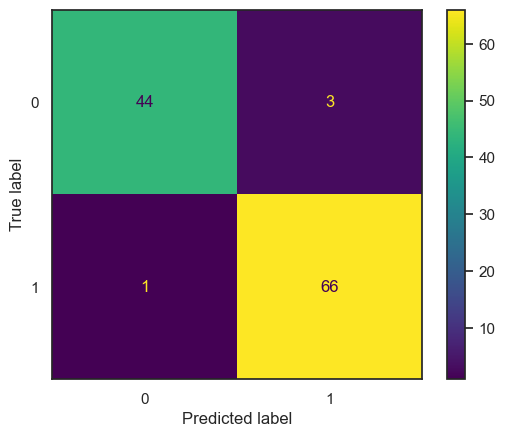

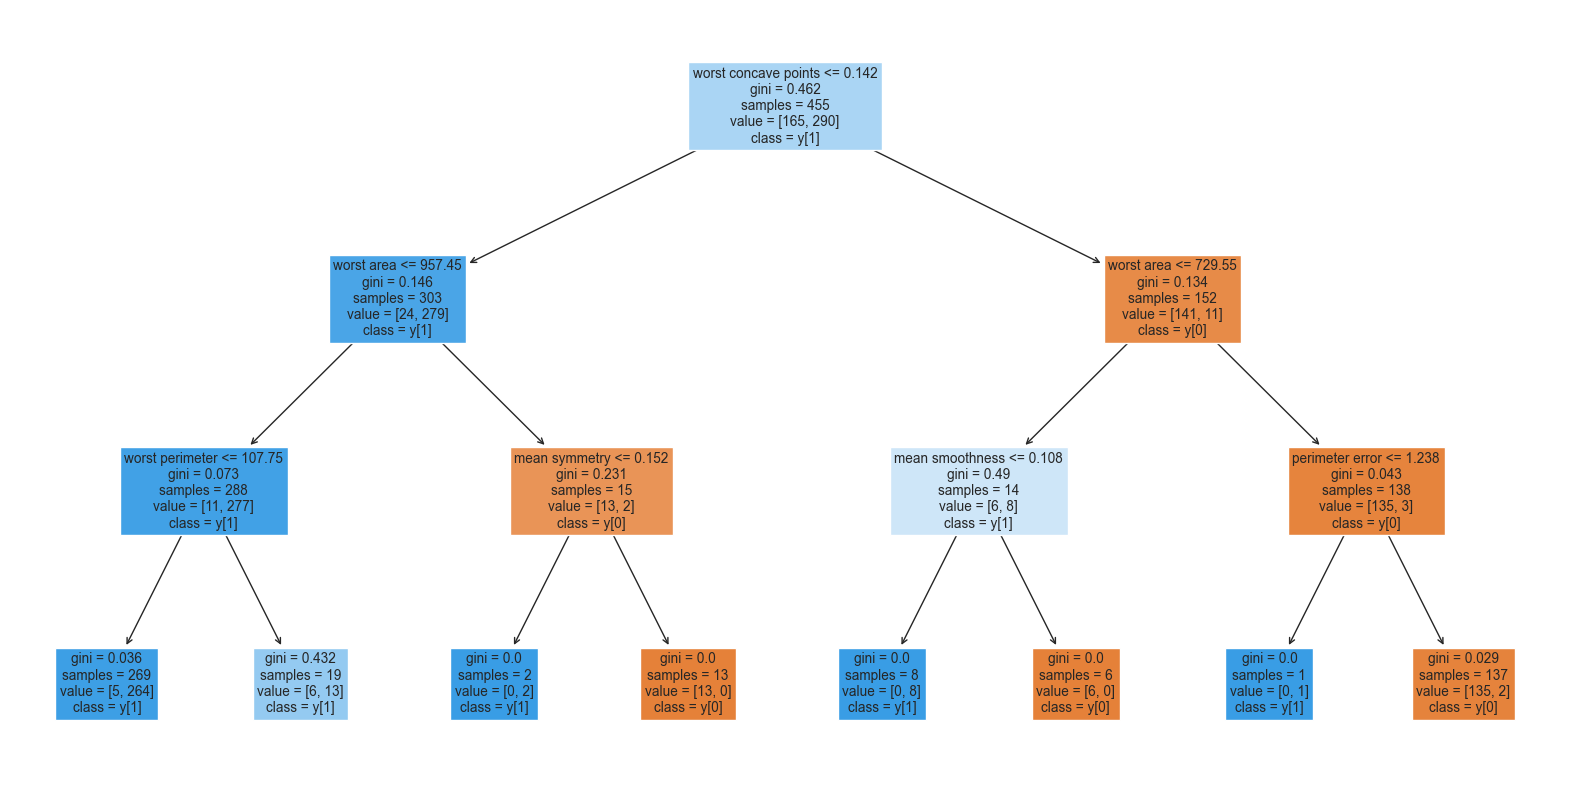

In [ ]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,y)
